# TP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./listings_big.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            35172 non-null  int64  
 1   listing_url                                   35172 non-null  object 
 2   scrape_id                                     35172 non-null  int64  
 3   last_scraped                                  35172 non-null  object 
 4   source                                        35172 non-null  object 
 5   name                                          35172 non-null  object 
 6   description                                   34299 non-null  object 
 7   neighborhood_overview                         16588 non-null  object 
 8   picture_url                                   35171 non-null  object 
 9   host_id                                       35172 non-null 

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20250129142212,2025-01-30,city scrape,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS 1 BDRM APT- POOL/ GYM/ 24-HR SECURIT...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,...,4.98,4.93,4.86,NaN,f,1,1,0,0,0.29
1,14222,https://www.airbnb.com/rooms/14222,20250129142212,2025-01-30,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,...,4.90,4.87,4.75,NaN,f,6,6,0,0,0.80
2,15074,https://www.airbnb.com/rooms/15074,20250129142212,2025-01-30,previous scrape,ROOM WITH RIVER SIGHT,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,16695,https://www.airbnb.com/rooms/16695,20250129142212,2025-01-30,city scrape,DUPLEX LOFT 2 - SAN TELMO,NaN,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,64880,...,4.80,4.39,4.41,NaN,t,9,9,0,0,0.27
4,20062,https://www.airbnb.com/rooms/20062,20250129142212,2025-01-30,city scrape,PENTHOUSE /Terrace & pool /City views /2bedrooms,NaN,NaN,https://a0.muscache.com/pictures/165679/2eb448...,75891,...,4.93,4.93,4.79,NaN,f,4,4,0,0,1.84


In [4]:
df.shape
df['price'] = df['price'].str.replace(r'[€$£,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [5]:
df.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               5760
Length: 79, dtype: int64

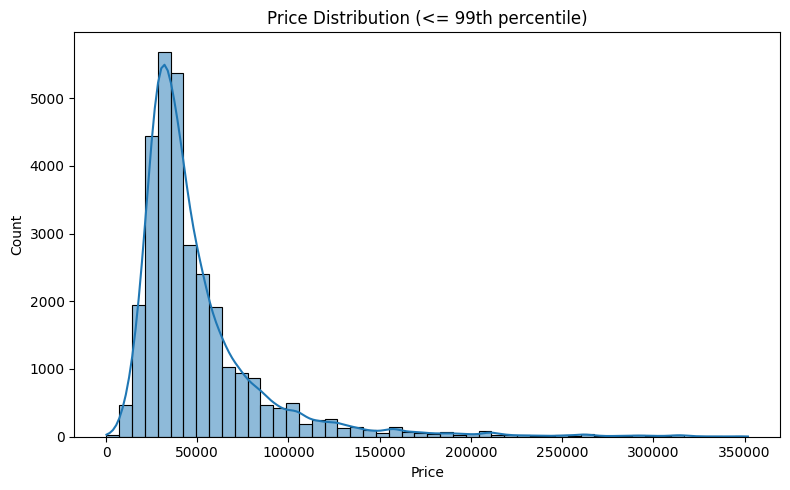

In [6]:
prices = df['price'].dropna()
# Filter extreme outliers (top 1%) for readability
filtered = prices[prices <= prices.quantile(0.99)]
plt.figure(figsize=(8,5))
sns.histplot(filtered, bins=50, kde=True)
plt.title('Price Distribution (<= 99th percentile)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Price Distribution by Room Type (<= 99th percentile)')

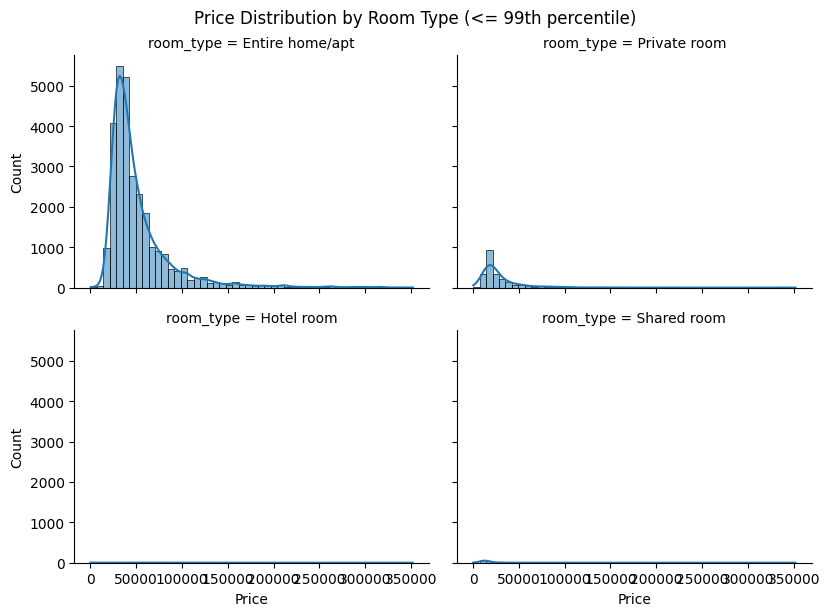

In [7]:
room_prices = df[['price', 'room_type']].dropna()
p99 = room_prices['price'].quantile(0.99)
subset = room_prices[room_prices['price'] <= p99]
g = sns.displot(data=subset, x='price', col='room_type', col_wrap=2, 
                 bins=50, kind='hist', kde=True, height=3.0, aspect=1.4,
                 facet_kws={'sharex': True, 'sharey': True})
g.set(xlabel='Price', ylabel='Count')
g.set_titles('room_type = {col_name}')
g.fig.suptitle('Price Distribution by Room Type (<= 99th percentile)', y=1.02)

In [8]:
medians = (
    df.groupby('room_type', dropna=False)['price']
      .median()
      .sort_values(ascending=False)
)
medians

room_type
Hotel room         53708.0
Entire home/apt    41169.0
Private room       21004.0
Shared room        13200.5
Name: price, dtype: float64